## GUIDE 1. UNIVARIATE DESCRIPTIVE STATISTICS

##### Developed by. Luis VIllarroel. Master in statistics
##### Email. lvillarroel@ucb.edu.bo  l_villarro@yahoo.es
##### Phone. +1 (206) 307 7131
##### Seattle Washington, USA

In [1]:
import pandas as pd
import numpy as nu 
import scipy as sc
import matplotlib.pyplot as plt


In [2]:
datos=pd.read_spss("D:/GESTIONES/GESTION 2021/CURSOS/UCB/1. UCB SCZ POSTGRADO/UCB POSTGRADO/BD/BDATOS.SAV")

In [3]:
datos.describe()

,ID,edad,ingresos,gasto,vivienda
count,42.000000,42.000000,42.000000,42.000000,42.000000
mean,21.500000,51.238095,501.357143,481.904762,0.547619
std,12.267844,8.248605,121.812896,124.278171,0.503761
min,1.000000,36.000000,320.000000,270.000000,0.000000
25%,11.250000,45.000000,385.750000,400.000000,0.000000
50%,21.500000,53.000000,497.500000,470.000000,1.000000
75%,31.750000,57.000000,571.500000,545.000000,1.000000
max,42.000000,68.000000,750.000000,800.000000,1.000000


In [17]:
datos.dtypes

ID           float64
sexo        category
edad         float64
compra      category
ingresos     float64
gasto        float64
vivienda     float64
ngasto      category
dtype: object

In [3]:
datos.head()

,ID,sexo,edad,compra,ingresos,gasto,vivienda,ngasto
0,1.0,Mujer,43.0,si,502.0,550.0,1.0,Alto
1,2.0,Mujer,61.0,si,703.0,400.0,1.0,Bajo
2,3.0,Mujer,36.0,si,485.0,400.0,0.0,Bajo
3,4.0,Mujer,55.0,si,572.0,560.0,1.0,Alto
4,5.0,Mujer,51.0,si,570.0,470.0,1.0,Normal


In [19]:
datos.columns

Index(['ID', 'sexo', 'edad', 'compra', 'ingresos', 'gasto', 'vivienda',
       'ngasto'],
      dtype='object')

### 1. DISTRIBUCIONES DE FRECUENCIA

#### H01. DISTRIBUCION DE FRECUENCIA NO AGRUPADA

In [20]:
datos_freq=(datos 
  .groupby("vivienda")
  .agg(frequency=("vivienda", "count")))
print (datos_freq)

          frequency
vivienda           
0.0              19
1.0              23


In [21]:
datos_tab = pd.crosstab(index=datos["vivienda"],columns="frecuencia")
print(datos_tab)

col_0     frecuencia
vivienda            
0.0               19
1.0               23


#### H02. DISTRIBUCION DE FRECUENCIA AGRUPADA

### 2. GRAFICAS

#### H03. DIAGRAMA DE BARRAS

In [22]:
datos_contar=datos.groupby("sexo")["ID"].count()
print(datos_contar)

sexo
Hombre    21
Mujer     21
Name: ID, dtype: int64


<AxesSubplot:title={'center':'Relacion hombre y mujeres'}, xlabel='sexo'>

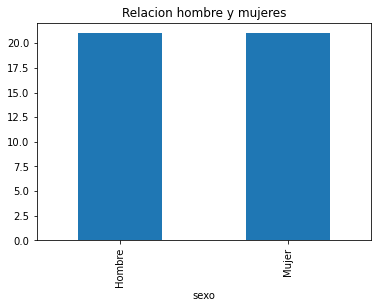

In [23]:
datos_contar.plot(kind='bar',title='Relacion hombre y mujeres')

<AxesSubplot:ylabel='ngasto'>

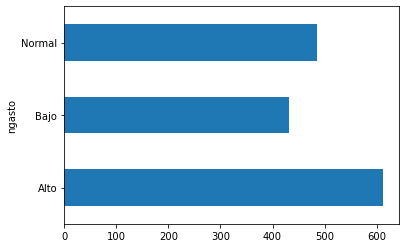

In [24]:
ingreso_cgasto=datos.groupby("ngasto")["ingresos"].mean()
ingreso_cgasto.head(10).plot.barh()

#### H04. DIAGRAMA DE TORTA

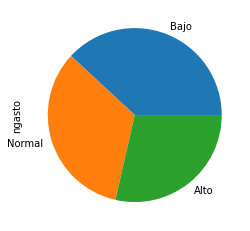

In [25]:
datos.ngasto.value_counts().plot.pie()
plt.show()

#### H05. HISTOGRAMA

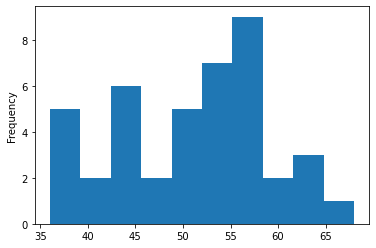

In [26]:
datos.edad.plot.hist()
plt.show()

#### H05.1. DIAGRAMA BOX PLOT

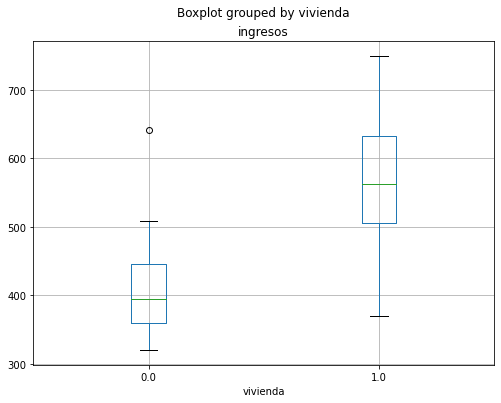

In [27]:
datos.boxplot(column="ingresos", by="vivienda", figsize=(8,6))
plt.show()

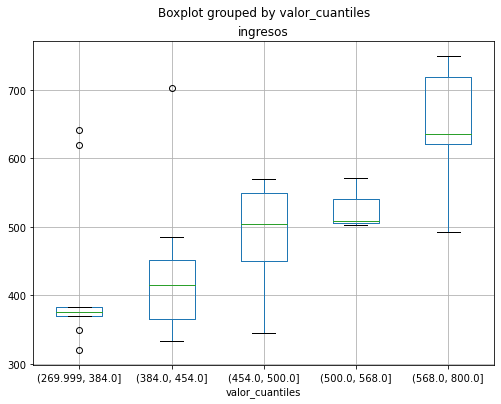

In [28]:
datos["valor_cuantiles"]=pd.qcut(datos.gasto, 5)
datos.boxplot(column="ingresos", by="valor_cuantiles", figsize=(8,6))
plt.show()

### 3.1. ESTADIGRAFOS DE POSICION

#### H06. PROMEDIO ARITMETICO

In [29]:
datos[["edad", "ingresos", "gasto"]].mean()

edad         51.238095
ingresos    501.357143
gasto       481.904762
dtype: float64

#### H07. MEDIANA

In [4]:
datos[["edad", "ingresos", "gasto"]].median()

edad         53.0
ingresos    497.5
gasto       470.0
dtype: float64

#### H08. MODA

In [31]:
datos[["edad", "ingresos", "gasto"]].mode()

,edad,ingresos,gasto
0,45.0,350.0,400.0
1,51.0,370.0,NaN
2,54.0,508.0,NaN
3,55.0,562.0,NaN
4,56.0,NaN,NaN
5,57.0,NaN,NaN
6,58.0,NaN,NaN


#### H09. CUARTILES

In [32]:
datos[["edad", "ingresos", "gasto"]].quantile(0.25)

edad         45.00
ingresos    385.75
gasto       400.00
Name: 0.25, dtype: float64

In [33]:
datos[["edad", "ingresos", "gasto"]].quantile(0.5)

edad         53.0
ingresos    497.5
gasto       470.0
Name: 0.5, dtype: float64

In [34]:
datos[["edad", "ingresos", "gasto"]].quantile(0.75)

edad         57.0
ingresos    571.5
gasto       545.0
Name: 0.75, dtype: float64

#### H10. PERCENTILES

In [35]:
datos[["edad", "ingresos", "gasto"]].quantile(0.8)

edad         57.8
ingresos    620.8
gasto       568.0
Name: 0.8, dtype: float64

#### OPCION DESCRIPTIVA DE PYTHON

In [36]:
datos[["edad", "ingresos", "gasto"]].describe()

,edad,ingresos,gasto
count,42.000000,42.000000,42.000000
mean,51.238095,501.357143,481.904762
std,8.248605,121.812896,124.278171
min,36.000000,320.000000,270.000000
25%,45.000000,385.750000,400.000000
50%,53.000000,497.500000,470.000000
75%,57.000000,571.500000,545.000000
max,68.000000,750.000000,800.000000


In [37]:
datos_sex=datos.groupby('sexo') # Crear un archivo split
datos_sex["ingresos"].describe()

,count,mean,std,min,25%,50%,75%,max
sexo,,,,,,,,
Hombre,21.0,518.904762,111.864161,370.0,418.0,508.0,621.0,750.0
Mujer,21.0,483.809524,131.371465,320.0,370.0,485.0,570.0,734.0


In [38]:
datos_vivienda=datos.groupby('vivienda')
datos_vivienda[["ingresos", "gasto"]].describe()

ingresos                                                             \
            count        mean         std    min    25%    50%    75%    max   
vivienda                                                                       
0.0          19.0  412.789474   76.245640  320.0  360.0  394.0  445.5  641.0   
1.0          23.0  574.521739  102.596238  370.0  506.0  562.0  632.5  750.0   

         gasto                                                             
         count        mean         std    min    25%    50%    75%    max  
vivienda                                                                   
0.0       19.0  410.526316   79.963442  270.0  365.0  400.0  465.0  600.0  
1.0       23.0  540.869565  124.568822  340.0  470.0  500.0  600.0  800.0

### 3.2. ESTADIGRAFOS DE DISPERSION

#### H11. VARIANZA

In [39]:
datos[["edad", "ingresos", "gasto"]].var()

edad           68.039489
ingresos    14838.381533
gasto       15445.063879
dtype: float64

#### H12. DESVIACION ESTANDAR O TIPICA

In [40]:
datos[["edad", "ingresos","gasto"]].std()

edad          8.248605
ingresos    121.812896
gasto       124.278171
dtype: float64

#### H13. COEFICIENTE DE VARIACION

In [41]:
promedio=datos["ingresos"].mean()
desviacion=datos["ingresos"].std()
print (promedio)
print (desviacion)
cv=desviacion/promedio*100
print (cv)

501.35714285714283
121.81289559443634
24.296631120132623


#### H14. AMPLITUD O RANGO

In [42]:
minimo=datos["ingresos"].min()
maximo=datos["ingresos"].max()
rango=maximo-minimo
print (rango)

430.0


#### H15. RANGO INTERCUARTIL

In [43]:
cuartil1=datos["ingresos"].quantile(0.25)
cuartil3=datos["ingresos"].quantile(0.75)
RIQ=cuartil3-cuartil1
print (RIQ)

185.75


### 3.3. ESTADIGRAFOS DE FORMA

#### H16. COEFICIENTE DE ASIMETRIA DE FISHER

In [44]:
datos[["edad","ingresos","gasto"]].skew()

edad       -0.215889
ingresos    0.388457
gasto       0.807740
dtype: float64

#### H17. COEFICIENTE DE CURTOSIS DE FISHER

In [45]:
datos[["edad","ingresos","gasto"]].kurt()

edad       -0.702485
ingresos   -0.865956
gasto       0.526103
dtype: float64